Import modules.

In [34]:
import cv2
import os
import splitfolders
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from matplotlib import pyplot as plt
import numpy as np

In [2]:
!pip list

Package                            Version             Editable project location
---------------------------------- ------------------- ----------------------------------------------------------------------
absl-py                            0.13.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
apyori                             1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall    

Define the base directory, random seed, and image size.

In [3]:
base_dir = "Dataset"
seed = 4870
size = 400

Define a function for resizing images.

In [4]:
def resize(a):
    i = cv2.imread(a)
    i = cv2.resize(i, (size, size))
    return i

Resize images of training dataset and test dataset respectively.

In [6]:
open_id = os.listdir(os.path.join(base_dir, "open"))
close_id = os.listdir(os.path.join(base_dir, "close"))

In [7]:
for i in open_id:
    img_dir = os.path.join(base_dir, "open", i)
    img = resize(img_dir)
    cv2.imwrite(img_dir, img)
for j in close_id:
    img_dir = os.path.join(base_dir, "close", j)
    img = resize(img_dir)
    cv2.imwrite(img_dir, img)

Split the data into train, test, and validation sets in a ratio of 8:1:1.

In [8]:
input_dir = os.path.join(base_dir)
output_dir = os.path.join("Dataset_v2")
splitfolders.ratio(input_dir, output = output_dir, seed = seed, ratio = (0.8, 0.1, 0.1), group_prefix = None)

Copying files: 111 files [00:00, 666.35 files/s]


Define the new base directory, directories storing training dataset, test dataset, and validation dataset respectively for the sake of simplicity.

In [9]:
new_base_dir = "Dataset_v2"
train_dir = os.path.join(new_base_dir, "train")
test_dir = os.path.join(new_base_dir, "test")
val_dir = os.path.join(new_base_dir, "val")

Read the images.

In [10]:
train_data = image_dataset_from_directory(train_dir, image_size = (size, size), batch_size = 32, shuffle = True, seed = seed)
test_data = image_dataset_from_directory(test_dir, image_size = (size, size), batch_size = 32, shuffle = True, seed = seed)
val_data = image_dataset_from_directory(val_dir, image_size = (size, size), batch_size = 32, shuffle = True, seed = seed)

Found 88 files belonging to 2 classes.
Found 13 files belonging to 2 classes.
Found 10 files belonging to 2 classes.


Build a CNN model.

In [11]:
model = Sequential()
transfer_model = ResNet50(include_top = False, weights = "imagenet", input_shape = (size, size, 3), input_tensor = None)
model.add(transfer_model)
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax", name = "output_layer"))
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "sparse_categorical_crossentropy", metrics = ["acc"])

Define callbacks and fit the model.

In [12]:
callbacks = [ModelCheckpoint(filepath = "ITP4870M_ResNet50_TL", save_best_only = True, monitor = "val_loss"), 
             EarlyStopping(monitor = "val_acc", patience = 3)]
history = model.fit(train_data, epochs = 10, validation_data = val_data, callbacks = callbacks)

Epoch 1/10
3/3 [==============================] - 243s 47s/step - loss: 3.6511 - acc: 0.5341 - val_loss: 0.9997 - val_acc: 0.7000


C:\Users\user\Documents\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: ITP4870M_ResNet50_TL\assets
Epoch 2/10
3/3 [==============================] - 111s 35s/step - loss: 2.8307 - acc: 0.7045 - val_loss: 3.7995 - val_acc: 0.6000
Epoch 3/10
3/3 [==============================] - 109s 32s/step - loss: 3.2361 - acc: 0.7500 - val_loss: 0.6610 - val_acc: 0.9000


C:\Users\user\Documents\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: ITP4870M_ResNet50_TL\assets
Epoch 4/10
3/3 [==============================] - 110s 35s/step - loss: 1.4076 - acc: 0.8523 - val_loss: 0.1916 - val_acc: 0.9000


C:\Users\user\Documents\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: ITP4870M_ResNet50_TL\assets
Epoch 5/10
3/3 [==============================] - 103s 33s/step - loss: 0.7290 - acc: 0.8977 - val_loss: 0.2236 - val_acc: 0.9000
Epoch 6/10
3/3 [==============================] - 102s 33s/step - loss: 0.4022 - acc: 0.9432 - val_loss: 0.8018 - val_acc: 0.9000


Visualize the training accuracy, validation accuracy, training loss, and validation loss respectively.

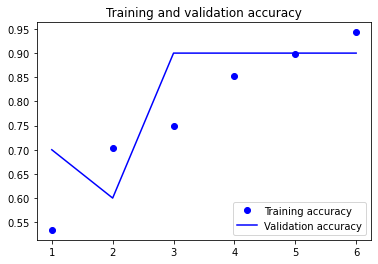

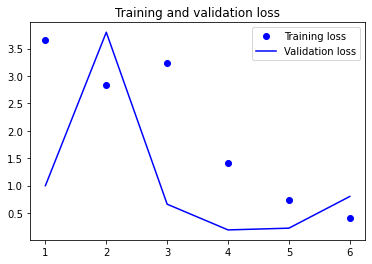

In [15]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Load the saved model and display the model summary.

In [19]:
model = load_model(os.path.join("ITP4870M_ResNet50_TL"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 13, 13, 2048)      23587712  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               37749248  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

Evaluate the performance of the model on training dataset.

In [20]:
train_metric = model.evaluate(train_data)
print("Training loss: {}".format(train_metric[0]))
print("Training accuracy: {}".format(train_metric[1]))

3/3 [==============================] - 23s 6s/step - loss: 0.1855 - acc: 0.9318
Training loss: 0.18547743558883667
Training accuracy: 0.9318181872367859


Evaluate the performance of the model on test dataset.

In [21]:
test_metric = model.evaluate(test_data)
print("Test loss: {}".format(test_metric[0]))
print("Test accuracy: {}".format(test_metric[1]))

1/1 [==============================] - 6s 6s/step - loss: 0.6208 - acc: 0.8462
Test loss: 0.6208000779151917
Test accuracy: 0.8461538553237915


In [22]:
model.predict(test_data)

array([[1.0000000e+00, 4.6727124e-09],
       [1.1896118e-04, 9.9988103e-01],
       [9.9999928e-01, 6.7151944e-07],
       [2.1634255e-06, 9.9999785e-01],
       [9.5788324e-01, 4.2116787e-02],
       [9.9854553e-01, 1.4545582e-03],
       [4.6567328e-09, 1.0000000e+00],
       [1.3613821e-05, 9.9998641e-01],
       [9.7680742e-01, 2.3192603e-02],
       [9.9952507e-01, 4.7496977e-04],
       [5.1500746e-07, 9.9999952e-01],
       [9.9238437e-01, 7.6156333e-03],
       [9.9999118e-01, 8.8708302e-06]], dtype=float32)

In [24]:
np.argmax(model.predict(test_data),axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [1 0 0 1 1 1 1 0 1 0 0 1 0]


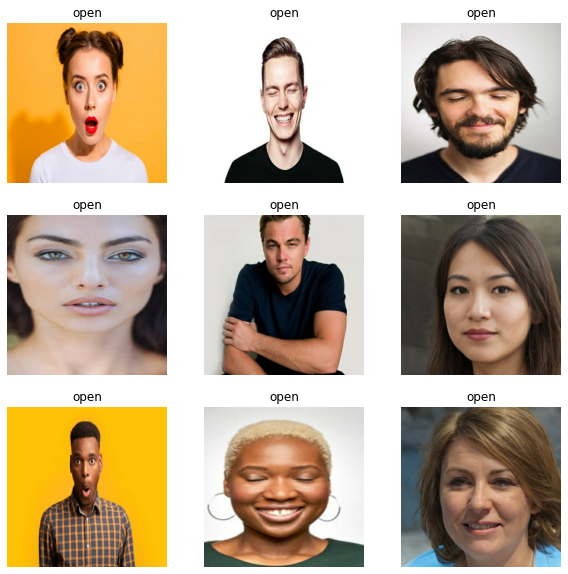

In [48]:
class_names = train_data.class_names
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")